# Predicting Bike Rentals

In this project, we would be looking at the bike rentals in Washington, D.C. which is one of many American cities where communal bike-sharing facilities are available. Bicycles are available for rent by the hour or day. The data set is available for download from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). The accompanying data dictionary, describing what each column represents is as follows:
* `instant` - A unique sequential ID number for each row
* `dteday` - The date of the rentals
* `season` - The season in which the rentals occurred
* `yr` - The year the rentals occurred
* `mnth` - The month the rentals occurred
* `hr` - The hour the rentals occurred
* `holiday` - Whether or not the day was a holiday
* `weekday` - The day of the week (as a number, 0 to 7)
* `workingday` - Whether or not the day was a working day
* `weathersit` - The weather (as a categorical variable)
* `temp` - The temperature, on a 0-1 scale
* `atemp` - The adjusted temperature
* `hum` - The humidity, on a 0-1 scale
* `windspeed` - The wind speed, on a 0-1 scale
* `casual` - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* `registered` - The number of registered riders (people who had already signed up)
* `cnt` - The total number of bike rentals (casual + registered)

We would be employing machine learning models in an attempt to predict the total number of rented bikes in a given hour. So the target column of interest would be the `cnt` column. A few different machine learning models would be created and their performance evaluated to determine the best machine learning model ideal for this prediction.

# Exploratory Data Analysis

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading in the csv file as a pandas dataframe
bike_rentals = pd.read_csv('bike_rental_hour.csv', parse_dates=['dteday'])

In [3]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


In [5]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1eeaf37320>]],
      dtype=object)

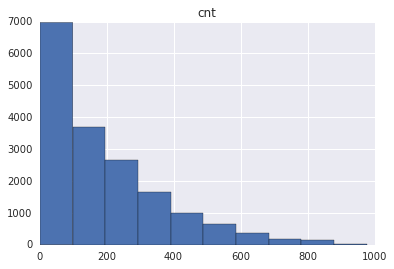

In [6]:
# Distribution of the number of bike rentals.
bike_rentals.hist('cnt', bins=10)

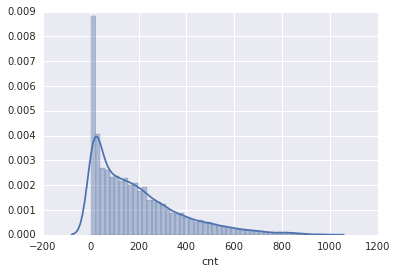

In [7]:
sns.distplot(bike_rentals['cnt'])

The distribution of bike rentals is skewed to the right.

In [8]:
# Determining the correlations of the columns with one another
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


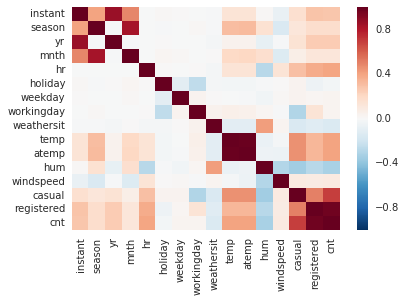

In [9]:
# Plotting a heatmap of the correlations
sns.heatmap(bike_rentals.corr())

Looking at the feature columns' correlations, some features are highly correlated with others. Notably, `temp` and `atemp` which are highly correlated. This results from `atemp` being an adjusted value from `temp`. The other set of highly correlated columns involve the `season` and `mnth` features which are obvious because the months would determine the season in which the rentals occurred. As such, to avoid multicollinearity, only one of each pair of highly correlated columns should be selected as a feature to be included in the machine learning model.

# Feature Engineering

Existing information can be distilled to creater a fuller picture for the machine learning model before fitting. The `hr` column is currently represented using the numeric hours but the machine learning model would treat each hour differently without taking in account that certain hours are related (i.e morning hours vs afternoon hours). It would thus be necessary to engineer a new feature that would introduce some order by creating a new column with labels for `morning`, `afternoon`, `evening` and `night`. Similar items would thus be bundled together, allowing the machine learning model to make better predictions. A categorical mapping would be as follows:

Category | Hours | Label
-- | -- | --
Morning | 6 to 12 | `1`
Afternoon | 12 to 18 | `2`
Evening | 18 to 24 | `3`
Night | 0 to 6 | `4`

In [10]:
# Creation of function to group the hours into categories and return the corresponding labels
def assign_label(hr):
    if 6 <= hr < 12:
        return 1
    elif 12 <= hr < 18:
        return 2
    elif 18 <= hr < 24:
        return 3
    elif 0 <= hr < 6:
        return 4

In [11]:
# Applying the function on the dataframe and creating a new column to represent the time category of the day
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [12]:
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


# Choice of Evaluation Metric

Looking at the `cnt` column, we are looking at a regression problem as we attempting to predict a real number instead of category labels. As such, we would be using the root mean-squared error (RMSE) as the evaluation metric in determining the choice of our model. The RMSE is chosen as it ignores the direction of the error and also penalizes larger errors by squaring and also, ensuring that the units of comparison are the same by taking the square root.

# Train Test Split

As with any machine learning workflow, we would need to split the data set into a training set and a testing set. The algorithm will be trained on the training set and then be evaluated on the testing set. 

In [13]:
# Selecting the relevant feature columns and the target column
features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'time_label']
target = 'cnt'

In [14]:
# Splitting the dataset into a training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bike_rentals[features], bike_rentals[target], test_size=0.2)

# Linear Regression

The first machine learning model we would employ would be linear regression. 

In [15]:
# Importing from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiating a LinearRegression class
lr = LinearRegression()

# Fitting the training data to the model
lr.fit(X_train, y_train)

# Using the model to make predictions on the testing data
predictions = lr.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

143.63361565149694

Looking at the RMSE, the linear regression model seems to perform rather poorly as the RMSE is very large. 

# Decision Tree

The next machine learning model we would employ would be the decision trees, specifically for regression. Decision trees tend to predict outcomes much better than linear regression models though overfitting is also more likely with decision trees. Furthermore, decision trees can be prone to small changes in the input data, resulting in very different outputs.

In [16]:
# Importing from sklearn
from sklearn.tree import DecisionTreeRegressor

# Instantiating a LinearRegression class, with default parameters
dt = DecisionTreeRegressor(min_samples_leaf=5)

# Fitting the training data to the model
dt.fit(X_train, y_train)

# Using the model to make predictions on the testing data
predictions = dt.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

130.07443152747138

The decision tree appears to perform slightly better than linear regression. However, the RMSE still remain fairly high. This could be attributed to a few outliers with extremely high number of bike rentals, which is consistent with the right-skewed distribution from the earlier plots. Such outliers would exhibit large errors which would be heavily penalized with the square in RMSE.

# Random Forest

Finally, we would employ random forest which is an ensemble model of decision trees. Random forests greatly improve on the decision tree algorithm through bagging and random feature subsets. Random forest would be much more accurate than simple models like decision trees and linear regression. Overfitting is also much less likely with random forests.

In [17]:
# Importing from sklearn
from sklearn.ensemble import RandomForestRegressor

# Instantiating a LinearRegression class, with default parameters
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=5)

# Fitting the training data to the model
rf.fit(X_train, y_train)

# Using the model to make predictions on the testing data
predictions = rf.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

116.45433345396926

As expected, the random forest perform much better with the lowest RMSE out of all 3 models employed.

# Conclusion

We can see that with increasing complexity of the model (Random Forest > Decision Tree > Linear Regression), the model appears to perform better based on our choice of evaluation metric which is the RMSE. However, the running time also increases with increasing complexity which has to be factored in when deciding on the choice of machine learning models with computing power constraints taken into consideration.

Besides looking at the different machine learning models, the features used could also be improved. More informative features could be engineered like creating a single index that accounts for the temperature, wind speed and humidity at once instead of including all three features. Also, instead of predicting for `cnt` column, predictions can be made for `casual` and `registered` separately since casual and registered users are likely to exhibit different usage behaviors in terms of bike rentals.